Concept and trying out the python packages for determining patches and microtubule ends:
- one linescan --> seperate the intensity values in python for errorfunction fitting
- ImageJ -> Analyze -> plot profile (Profile: Grey_values as y-axis and distance pixel as x-axis ) gives a csv file 
- Import data from csv file to python 
- Per sub profile fit errorfunction
- calculate the µ mean value from errorfunction to get the pixel/position of linescan where the patch starts and ends



In [1]:
import numpy as nump 
import math 
import pandas as pan #reading lines from csv file intp an array later 
import os 
import glob # getting the csv files which are stored in the same folder
import tkinter as tkin
from tkinter import filedialog

In [4]:
#defining the path 
# my path C:\Users\Clara\Documents\Universiteit Utrecht\Major internship\example_data_capped_MT_from_13_01_22
#my_working_path=filedialog.askdirectory(title='choose parent folder in which other folders incl. results are found format:.csv')
#my_working_path="C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\example_data_capped_MT_from_13_01_22"
my_working_path=input("Please insert the working path here:")
os.chdir(my_working_path)   # changing the workdirectory to where I have currently my csv file stored 
work=os.getcwd()   
#print("Workdirectory: " + work)
my_csv_files = glob.glob(os.path.join(work, "*.csv")) # identifies the csv files in this directory
print(my_csv_files)


Please insert the working path here: C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\example_data_capped_MT_from_13_01_22


['C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\example_data_capped_MT_from_13_01_22\\Values_antialphatubulin_488_n11_p11_0394-0124.csv', 'C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\example_data_capped_MT_from_13_01_22\\Values_example.csv', 'C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\example_data_capped_MT_from_13_01_22\\Values_rhodamin_MT_561_n12_p11_0394-0124.csv', 'C:\\Users\\Clara\\Documents\\Universiteit Utrecht\\Major internship\\example_data_capped_MT_from_13_01_22\\Values_wholelinescan_488_4.csv']


In [24]:
#for l in my_csv_files: 
  #  reading=pan.read_csv(l)# using panda for reading the csv files in the directory 
    #print(l) all the csv files in the directory
    

The files consists of two columns: one for the distance in pixel and the other one for the frequency along the linescan

In [28]:
my_CSVs={}
for i in range(len(my_csv_files)): 
    data=pan.read_csv(my_csv_files[i],sep=',')
    print(data.head())
    #print(reading) 
# now converting the files into a nparray or list.
    new_key="MT"+str(i) # creating a new key for each linescan of microtubule so that I have different arrays 
    my_CSVs[new_key]= data.to_numpy()
print (my_CSVs.keys())   
#print (my_CSVs.values())  
print(len(my_CSVs["MT3"]))
      


   Distance_(pixels)  Gray_Value
0                  0   13758.000
1                  1   11602.824
2                  2   10558.744
3                  3   10666.933
4                  4   10500.648
   Distance_(pixels)  Gray_Value
0                  0    8811.750
1                  1    9551.678
2                  2    8924.812
3                  3   10929.304
4                  4    9837.686
   Distance_(pixels)  Gray_Value
0                  0   19083.750
1                  1   19611.701
2                  2   19066.824
3                  3   18825.156
4                  4   18583.186
   Distance_(pixels)  Gray_Value
0                  0    6881.000
1                  1    7342.971
2                  2    7557.817
3                  3    8865.755
4                  4    8589.536
dict_keys(['MT0', 'MT1', 'MT2', 'MT3'])
165


In [22]:
x_data=[]
y_data=[]
x_data_1=[]
y_data_1=[]
x_data_2=[]
y_data_2=[]
x_data_3=[]
y_data_3=[]
a=0
for k in my_CSVs: #accessing the arrays in the dictonary over their key (k) 
    for j in range(0, len(my_CSVs[k])):
        if k=="MT0": # saving x and y data in list to plot the data nicely 
            x_data+=[(my_CSVs[k][j,0])]
            y_data+=[(my_CSVs[k][j,1])]
        elif k=="MT1": 
            x_data_1+=[(my_CSVs[k][j,0])]
            y_data_1+=[(my_CSVs[k][j,1])]   
        elif k=="MT2": 
            x_data_2+=[(my_CSVs[k][j,0])]
            y_data_2+=[(my_CSVs[k][j,1])]   
        elif k=="MT3": 
            x_data_3+=[(my_CSVs[k][j,0])]
            y_data_3+=[(my_CSVs[k][j,1])]   
print(x_data_2,"\n", x_data_3) 
print(len(x_data_2),"\n", len(x_data_3))


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0] 
 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0,

In [6]:
#Finding maximum values 
y_max_1=max(y_data_1)
index_max= y_data_1.index(y_max_1)
print(y_max_1, index_max)

new_list_1=y_data_1[:index_max]
new_list_2=y_data_1[index_max+1:]
#print (new_list_1, new_list_2)

new_list={}
n=1
for i in range(len(y_data_1)):
    y_max_1=max(y_data_1)
    index_max= y_data_1.index(y_max_1)
    new_list[0]=y_data_1[:index_max]
    new_list[n]=y_data_1[index_max+1:]
    if i > y_data_1.index(y_max_1): # just for intensities after the max 
        new_max=max(new_list[n])
        new_index_max=new_list[n].index(new_max)
        new_list[n+1]=new_list[n][new_index_max+1:]
        
        
        
    

65535.0 35


Text(0.5, 1.0, 'Linescan Intensity profile of MT0')

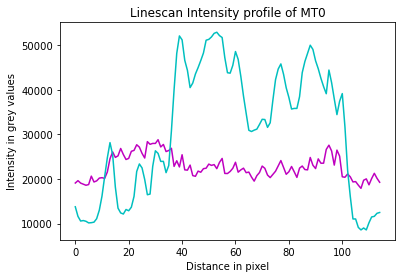

In [31]:
import matplotlib.pyplot as plt 
plt.plot(x_data_2, y_data_2, c="m")
plt.plot(x_data,y_data,c="c") #plot another line in the same plot 
plt.xlabel("Distance in pixel")
plt.ylabel("Intensity in grey values") 
plt.title("Linescan Intensity profile of MT0")


Text(0.5, 1.0, 'Part of linescan Intensity profile of MT1')

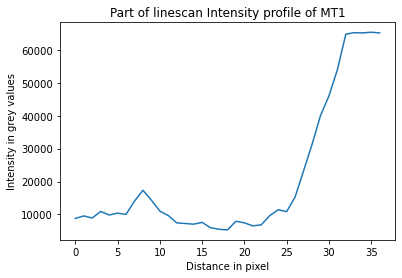

In [111]:
import matplotlib.pyplot as plt 
plt.plot(x_data, y_data)
plt.xlabel("Distance in pixel")
plt.ylabel("Intensity in grey values") 
plt.title("Part of linescan Intensity profile of MT1")
